# This is an explanantion how Finite Element Method works. Basically we are going to see the Rayleigh-Ritz method, then the Residual method, the Galerking method and finally the Finite Element method.

## At first, we are going to solve the following equation:

\begin{eqnarray}
-\frac{d^2u}{dx^2}+u=6-3x^2+20x-3\sin\left(\frac{3{\pi}x}{2}\right)-\frac{27{\pi}^2}{4}\sin\left(\frac{3{\pi} x}{2}\right).
\label{eq-dif}
\end{eqnarray}

## that can be re-written as,

\begin{eqnarray}
Lu=h, \nonumber
\end{eqnarray} 	

## where,		
\begin{eqnarray}
L=-\frac{d^2}{dx^2}+1 \nonumber
\end{eqnarray} 
	
## and,	
\begin{eqnarray}
h=6-3x^2+20x-3\sin\left(\frac{3{\pi}x}{2}\right)-\frac{27{\pi}^2}{4}\sin\left(\frac{3{\pi} x}{2}\right). \nonumber
\end{eqnarray}

## $L$ is a linear operator that can define a dot product. (I need to remember better how to go from (1) to (2), but with the other methods that is clear.) 

\begin{eqnarray}
<Lu,\phi>\hspace{0.2cm}=\hspace{0.2cm}<u,\phi>_L, \; \; \; \; \; \; \; \; \; \; \; \;  (1)
\end{eqnarray}
	 	
## defined as,
	 	
\begin{eqnarray}
<u,\phi>_L\hspace{0.2cm}= \int_0^1 [u'(x)\phi'(x)+u(x)\phi(x)]dx.  \; \; \; (2)
\end{eqnarray}	 	
	 	
## Basicaly we project both sides of the equation in the subspace driven by the base functions related to $L$
	
\begin{eqnarray}
<u,\phi>_L\hspace{0.2cm}=\hspace{0.2cm} <h,\phi>_L \nonumber
\end{eqnarray}

## or,

\begin{eqnarray}
\int_0^1 [u'(x)\phi'(x)+u(x)\phi(x)]dx=\int_0^1 [h(x)\phi(x)]dx. \nonumber
\end{eqnarray}	

## So, if we have $n$ base functions,

\begin{eqnarray}
\sum_{j=1}^{n} <\phi_i,\phi_j>_L \alpha_n= <\phi_i,h>_L
\end{eqnarray}

## The base functions can be any set of functions that define a subspace. Being zero at the borders are important in order to contain the trivial base function, zero everywhere.

\begin{eqnarray}
\phi_n = x^n(1-x),
\end{eqnarray}

## or,

\begin{eqnarray}
\psi_n = x^{\frac{n-1}{2}}\sin(\pi x),
\end{eqnarray}

## Defining the $u$ function as a linear combination of the base functions ($\phi$ or $\psi$),
	
\begin{eqnarray}
u = \alpha_1\phi_1+\alpha_2\phi_2....+\alpha_n\phi_n+...
\label{CL}
\end{eqnarray}  	

## we have a linear system,

\begin{eqnarray}
\sum_{j=1}^n\alpha_j\int_0^1 [\phi_j'(x)\phi_i'(x)+\phi_j(x)\phi_i(x)]dx = \int_0^1 [\phi_i(x)h(x)]dx, \; i=1,2...n, \nonumber
\end{eqnarray}

## The hole idea is that the integrals are easier to be solved now in terms of the base functions. By increasig the number of bases we reduce the error. Now, let's solve this differencial equation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import sympy
from scipy.integrate import quad

In [2]:
m = np.int(input("Please, how many bases you need?\n"))

Please, how many bases you need?
7


### Defining some functions

In [3]:
def csch(x):
    return sympy.sinh(x)**(-1)

def h(x):
    return 6 - 3*x**2 + 20*x - 3*np.sin(3*np.pi*x/2) - (27*np.pi**2)*np.sin(3*np.pi*x/2)/4

# analytical solution
def ua(x):
    return -3* x**2 + 20*x - 3*np.sin(3*np.pi*x/2) - 20*csch(1)*np.sinh(x)

# bases of type one (phi)
def phi(x, n):
    return x**n*(1-x)

# derivative of bases of type one (phi)
def dphi(x, n):
    return n*( x**(n -1)) - (( n +1)*x**n)

# bases of type two (psi)
def psi(x, n):
    return x**((n - 1)/2)*np.sin(np.pi*x)

# derivative of bases of type two (psi)
def dpsi(x, n):
    return ((n - 1)/2)*(x**((n - 3)/2))*np.sin (np.pi*x) + np.pi*(x**((n - 1)/2))*np.cos(np.pi*x)

# bases of type three (hat)
def hat(x, n):
    y = x*0
    for i, v in enumerate(x):
        if(x[i] < pp[n-1] or x[i] > pp[n+1]):
            y[i] = 0
        elif(pp[n-1] <= x[i] and x[i] <= pp[n]):
            y[i] = (x[i] - pp[n-1]) / (pp[n] - pp[n-1])
        else:#elif(pp[n] <= x[i] and x[i] <= pp[n+1]):
            y[i] = (pp[n+1] - x[i]) / (pp[n+1] - pp[n])
    return y

# Analitical solution for the terms of the main diagonal when using the hat function
def hatd(x, n):
    return 1/(x[n] - x[n-1]) + 1/(x[n+1] - x[n]) + (x[n] - x[n-1])/3 + (x[n+1] - x[n])/3

# Analitical solution for the terms of the side diagonals when using the hat function
def hatd2(x, n):
    return -1/(x[n+1] - x[n]) + (x[n+1] - x[n])/6

def fem1(x, n):
    return 1 - (x - pp[n-1])/(pp[n] - pp[n-1])

def fem2(x, n):
    return (x - pp[n-1])/(pp[n] - pp[n-1])


# Rayleigh-Ritz
## $\phi$ 

In [4]:
A = np.zeros([m,m])
b = np.zeros(m)

In [5]:
for p in range(m):
    b[p], err = quad(lambda x,p: phi(x,p+1)*h(x), 0, 1, args=(p,))
    for q in range(m):
        A[p, q] = quad(lambda x,p,q: phi(x, p+1)*phi(x, q+1), 0, 1, args=(p,q))[0] + quad(lambda x,p,q: dphi(x, p+1)*dphi(x, q+1), 0, 1, args=(p,q))[0]

In [6]:
coef1 = np.matmul(b, np.linalg.pinv(A))

In [7]:
x = np.linspace(0,1,1000)

In [8]:
colors = ['r', 'm', 'g', 'c', 'b', 'm', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k', 'k']

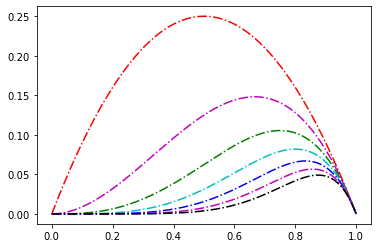

In [9]:
u1 = np.zeros(len(x))
xx = np.linspace(0,1,5)
u2 = np.zeros(len(xx))
for p in range(m):
    u1 = u1 + coef1[p]*phi(x, p+1)
    u2 = u2 + coef1[p]*phi(xx, p+1)
    plt.plot(x, phi(x,p+1), '-.' + colors[p])

### above are the base functions of type $\phi$ and below are the coefitients ($\alpha_{j}$) we found in order to obtain the solution by linear combinantion of the basis.

In [10]:
coef1

array([-11.15894574, -14.04221567,  34.17850208,  40.42103313,
       -33.44765435, -14.53711841,  10.8516427 ])

(-5.0, 5.0)

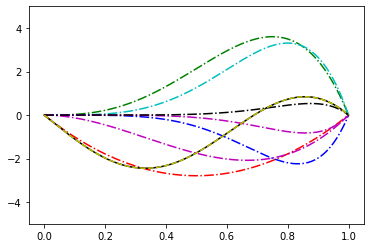

In [11]:
for p in range(m):
    plt.plot(x, coef1[p]*phi(x,p+1), '-.' + colors[p])
plt.plot(x, ua(x), 'k', x, u1, '--y')
#plt.plot(xx, u2, '*r')

plt.ylim([-5, 5])

### above are the solution (analytical and numerical) and the base functions multiplied by the corresponding coeficient. We can see how each one contribute to the solution.

# Rayleigh-Ritz
## $\psi$

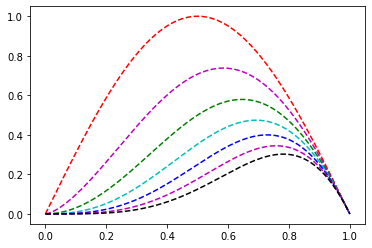

In [12]:
B = np.zeros([m,m])
d = np.zeros(m)

for p in range(m):
    d[p], err = quad(lambda x,p: psi(x,p+1)*h(x), 0, 1, args=(p,))
    for q in range(m):
        B[p, q] = quad(lambda x,p,q: psi(x, p+1)*psi(x, q+1), 0, 1, args=(p,q))[0] + quad(lambda x,p,q: dpsi(x, p+1)*dpsi(x, q+1), 0, 1, args=(p,q))[0]
    
coef_psi = np.matmul(d, np.linalg.pinv(B))
#x = np.linspace(0,1,1000)    
u_psi = np.zeros(len(x))
for p in range(m):
    u_psi = u_psi + coef_psi[p]*psi(x, p+1)
    plt.plot(x, psi(x,p+1), '--' + colors[p])

In [13]:
coef_psi

array([ -3.52182747,  -0.61460705,   3.55793314, -15.52861815,
        37.10042726, -23.35408141,   6.25431215])

(-5.0, 5.0)

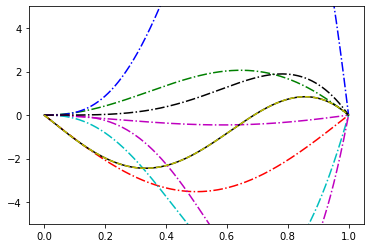

In [14]:
for p in range(m):
    plt.plot(x, coef_psi[p]*psi(x,p+1), '-.' + colors[p])
plt.plot(x, ua(x), 'k', x, u_psi, '--y')
plt.ylim([-5, 5])

# Residuos

## Basically is used a weight function ($v$) to minimize the error,

\begin{eqnarray}
-\frac{d^2u}{dx^2}+u-h =\epsilon, \nonumber
\end{eqnarray}

## Making $<\epsilon,v_i>=0$, we force the error to be orthogonal to each weigh function and then not belong to the same subspace of $v$ functions. As long as the number of functions increase $\epsilon \rightarrow 0$ is the only way to satisfy the dot product being zero.

\begin{eqnarray}
\int_0^1(-\frac{d^2u}{dx^2}+u-h)\ v=0, \nonumber
\end{eqnarray}

## Spliting the terms and by doing integration by parts twice, we have:

\begin{eqnarray}
\int_0^1 (u'v'+u\ v)dx + u v'\vert_{0}^{1}= \int_0^1 (v\ h)dx. \nonumber
\end{eqnarray}

### Because u is zero at the boundaries
\begin{eqnarray}
\int_0^1 (u'v'+u\ v)dx = \int_0^1 (v\ h)dx. \nonumber
\end{eqnarray}


## As we saw before,
\begin{eqnarray}
u = \alpha_1\phi_1+\alpha_2\phi_2....+\alpha_n\phi_n+...
\end{eqnarray}

## but $v$ can also be defined as a linear combination of base functions as well
\begin{eqnarray}
v = \beta_1\psi_1+\beta_2\psi_2....+\beta_n\psi_n+...
\end{eqnarray}

### and by making $\beta_i=1$, then, $v=\psi_1+\psi_2+...\psi_n...$ and truncating the sequence,

\begin{eqnarray}
\sum_{j=1}^n\alpha_j\int_0^1 [\phi_j'(x)\psi_i'(x)+\phi_j(x)\psi_i(x)]dx = \int_0^1 [h(x)\psi_i(x)]dx,
\ \ i=1,2...n, \nonumber
\end{eqnarray}

## Basically it is almost the same equation as before.

## $\phi$ as base functions and $\psi$ as weight functions to minimize the $\epsilon$

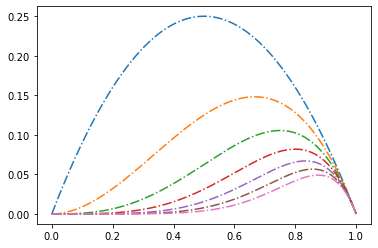

In [15]:
C = np.zeros([m,m])
d = np.zeros(m)

for p in range(m):
    d[p], err = quad(lambda x,p: psi(x,p+1)*h(x), 0, 1, args=(p,))
    for q in range(m):
        C[p, q] = quad(lambda x,p,q: phi(x, p+1)*psi(x, q+1), 0, 1, args=(p,q))[0] + quad(lambda x,p,q: dphi(x, p+1)*dpsi(x, q+1), 0, 1, args=(p,q))[0]
    
coef_residuos = np.matmul(d, np.linalg.pinv(C))
#x = np.linspace(0,1,1000)    
u_residuos = np.zeros(len(x))
for p in range(m):
    u_residuos = u_residuos + coef_residuos[p]*phi(x, p+1)
    plt.plot(x, phi(x,p+1), '-.')

In [16]:
coef_residuos

array([-11.15592616, -14.13148578,  34.97904352,  37.30049489,
       -27.53045898, -19.9011486 ,  12.71123007])

(-5.0, 5.0)

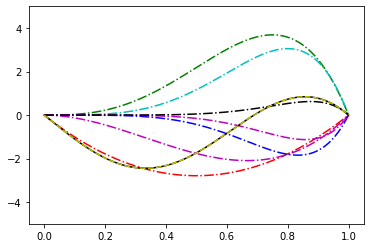

In [17]:
for p in range(m):
    plt.plot(x, coef_residuos[p]*phi(x,p+1), '-.' + colors[p])
plt.plot(x, ua(x), 'k', x, u_residuos, '--y')
plt.ylim([-5, 5])

### above are the solution (analytical and numerical) and the base functions ($\phi_j$) multiplied by the corresponding coeficient. We can see how each one contribute to the solution.

# Residuos
# $\psi$ as base functions and $\phi$ as weight functions to minimize the $\epsilon$


In [18]:
range(1,3,m)

range(1, 3, 7)

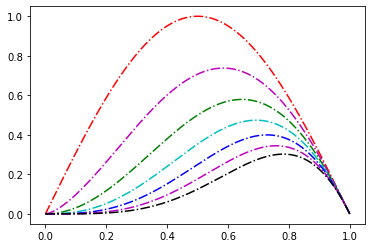

In [19]:
C = np.zeros([m,m])
d = np.zeros(m)

for p in range(m):
    d[p], err = quad(lambda x,p: phi(x,p+1)*h(x), 0, 1, args=(p,))
    for q in range(m):
        C[p, q] = quad(lambda x,p,q: psi(x, p+1)*phi(x, q+1), 0, 1, args=(p,q))[0] + quad(lambda x,p,q: dpsi(x, p+1)*dphi(x, q+1), 0, 1, args=(p,q))[0]
    
coef_residuos = np.matmul(d, np.linalg.pinv(C))
#x = np.linspace(0,1,1000)    
u_residuos = np.zeros(len(x))
for p in range(m):
    u_residuos = u_residuos + coef_residuos[p]*psi(x, p+1)
    plt.plot(x, psi(x,p+1), '-.' + colors[p])

In [20]:
coef_residuos

array([ -3.32072808,  -3.42248648,  18.34011903, -53.98357345,
        90.05370927, -60.35220699,  16.58420261])

(-5.0, 5.0)

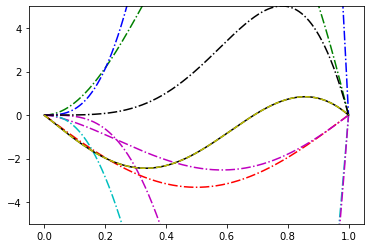

In [21]:
for p in range(m):
    plt.plot(x, coef_residuos[p]*psi(x,p+1), '-.' + colors[p])
plt.plot(x, ua(x), 'k', x, u_residuos, '--y')
plt.ylim([-5, 5])

### above are the solution (analytical and numerical) and the base functions ($\psi_j$) multiplied by the corresponding coeficient. We can see how each one contribute to the solution.

# Galerkin

# Galerkin is basically the residuos when the base functions are the same type as the weight functions

## But let's use the hat (^) functions this time. Otherwise the solution would be the same as obtained before with the Rayleigh-Ritz. (***There is a difference that makes the Galerkin more general, but I don't remember why)

## So, again we are going to solve,

\begin{eqnarray}
\sum_{j=1}^n\alpha_j\int_0^1 [\phi_j'(x)\phi_i'(x)+\phi_j(x)\phi_i(x)]dx = \int_0^1 [h(x)\phi_i(x)]dx,
\ \ i=1,2...n, \nonumber
\end{eqnarray}

## but 

\begin{eqnarray}
\phi(x)= 
\begin{cases}
    0,& \text{if } x\leq x_{i-1} \\
   (x - x_{i-1}) / (x_i − x_{i-1}) & \text{if } x_{i-1}\leq x \leq x_i      \\
   (x_{i+1} - x) / (x_{i+1} − x_i) & \text{if } x_{i}\leq x \leq x_{i+1}   \\
    0 & \text{if }             x\geq x_{i+1}
\end{cases}
\end{eqnarray}

## and
\begin{eqnarray}
\phi'(x)= 
\begin{cases}
    0,& \text{if } x\leq x_{i-1} \\
   1 / (x_i − x_{i-1}) & \text{if } x_{i-1}\leq x \leq x_i      \\
   -1 / (x_{i+1} − x_i) & \text{if } x_{i}\leq x \leq x_{i+1}   \\
    0 & \text{if }             x\geq x_{i+1}
\end{cases}
\end{eqnarray}

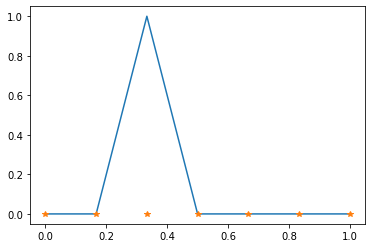

In [22]:
#pp = np.array([0, 1/6, 1/3, 1/2, 2/3, 3/4, 5/6, 11/12, 1])
#pp = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5, 12]) / 12
pp = np.linspace(0,1,m)

plt.plot(x, hat(x,2))
plt.plot(pp, pp*0, '*')

In [23]:
D = np.zeros([m,m])
g = np.zeros(m)

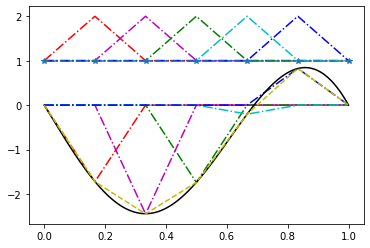

In [24]:
pp = np.linspace(0,1,m)

m = len(pp) - 2

for p in range(m):
    g[p] = quad(lambda x,p: (( x -  pp[p]) / (pp[p+1] - pp[p])) * h(x), pp[p], pp[p+1], args=(p,))[0] \
        + quad(lambda x,p: ((pp[p+2] - x) / (pp[p+2]-pp[p+1])) * h(x), pp[p+1], pp[p+2], args=(p,))[0] 
    for q in range(m):
        if( p == q ):
            D[p,q] = hatd(pp,p+1)
        elif(abs(p - q) == 1):
            D[p,q] = hatd2(pp,p+1)

coef_galerkin = np.matmul(g, np.linalg.pinv(D))

u_galerkin = np.zeros(len(x))

s=1 #shift
for p in range(m):
    u_galerkin = u_galerkin + coef_galerkin[p]*hat(x, p+1)
    plt.plot(x, hat(x,p+1) + s, '-.' + colors[p])
    plt.plot(x, coef_galerkin[p]*hat(x,p + s), '-.' + colors[p])

plt.plot(pp, pp*0+s, '--*')

plt.plot(x, ua(x), 'k', x, u_galerkin, '--y')


# irregular spacing (need to be fixed!)

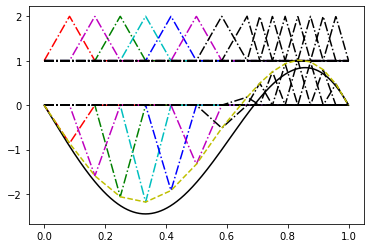

In [25]:
#pp = np.array([0, 1/6, 1/3, 1/2, 2/3, 3/4, 5/6, 11/12, 1])
pp = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5, 12]) / 12
#pp = np.linspace(0,1,m)

m = len(pp) - 2

D_ = np.zeros([m,m])
g_ = np.zeros(m)

for p in range(m):
    g_[p] = quad(lambda x,p:  (x - pp[p]) / (pp[p+1] - pp[p]) * h(x), pp[p], pp[p+1], args=(p,))[0] \
         + quad(lambda x,p: (pp[p+2] - x) / (pp[p+2] - pp[p+1]) * h(x), pp[p+1], pp[p+2], args=(p,))[0]
    
    for q in range(m):
        if( p == q ):
            D_[p,q] = hatd(pp,p+1)
        elif(abs(p - q) == 1):
            D_[p,q] = hatd2(pp,p+1)

coef_galerkin_ = np.matmul(g_, np.linalg.pinv(D_))

u_galerkin_ = np.zeros(len(x))

s=1 #shift
for p in range(m):
    u_galerkin_ = u_galerkin_ + coef_galerkin_[p]*hat(x, p+1)
    plt.plot(x, hat(x,p+1) + s, '-.' + colors[p])
    plt.plot(x, coef_galerkin_[p]*hat(x,p+1), '-.' + colors[p])

#plt.plot(pp, pp*0+s, '--*')

plt.plot(x, ua(x), 'k', x, u_galerkin_, '--y')


# Finite Element Method
## The FEM is based on the galerking method, but the main difference here is that while the base functions were defined in the entire domain, now we focus on a inner "element" or "cell" and define the simpliest base function inside it.

\begin{eqnarray}
\phi_1^e(\zeta) = 1 - \frac{\zeta - x_1^e}{x_2^e - x_1^e}
\end{eqnarray}

\begin{eqnarray}
\phi_2^e(\zeta) = \frac{\zeta - x_1^e}{x_2^e - x_1^e}
\end{eqnarray}

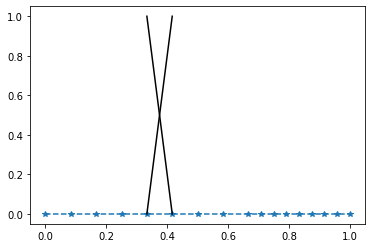

In [26]:
e = 5

#pp = np.array([0, 1/6, 1/3, 1/2, 2/3, 3/4, 5/6, 11/12, 1])
pp = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5, 12]) / 12
#pp = np.linspace(0,1,m)
m = len(pp)
plt.plot(pp, pp*0, '--*')

xx = np.linspace(pp[e-1], pp[e], 1000)
plt.plot(xx,fem1(xx,e),'k')
plt.plot(xx,fem2(xx,e),'k')

## and define $u$ as a linear combination of these two base functions (inside the interval),
	
\begin{eqnarray}
u(\zeta) = u_1^e\phi_1+u_2^e\phi_2
\end{eqnarray} 

\begin{eqnarray}
\sum_{j=1}^2[u_j(\int_{\Omega_e} [\phi_j'(x)\phi_i'(x)+\phi_j(x)\phi_i(x)]dx) + \phi_i \phi_j'\vert_{x^e_1}^{x^e_2}] = \int_{\Omega_e} h(x)\phi_i(x)dx,
\  \nonumber
\end{eqnarray}

## or
\begin{eqnarray}
\left[ \begin{array}{cc}
I^e & III^e \\
III^e & II^e \end{array} \right]
\left[ \begin{array}{c}
u^e_1 \\
u^e_2 \end{array} \right]
=\left[ \begin{array}{c}
IV^e \\
V^e \end{array} \right],
\label{sistema}
\end{eqnarray}

## where
\begin{eqnarray}
I^e=\int_{x^e_1}^{x^e_2} [\phi_1'(x)\phi_1'(x)+\phi_1(x)\phi_1(x)]dx, \nonumber
\end{eqnarray}

\begin{eqnarray}
II^e=\int_{x^e_1}^{x^e_2} [\phi_2'(x)\phi_2'(x)+\phi_2(x)\phi_2(x)]dx, \nonumber
\end{eqnarray}

\begin{eqnarray}
III^e=\int_{x^e_1}^{x^e_2} [\phi_2'(x)\phi_1'(x)+\phi_2(x)\phi_1(x)]dx, \nonumber
\end{eqnarray}

\begin{eqnarray}
IV^e=\left[\int_{x^e_1}^{x^e_2} [\phi_1(x)h(x)]dx\right]-u^e_1GI-u^e_2GIII_1
\label{f1}
\end{eqnarray}

\begin{eqnarray}
V^e=\left[\int_{x^e_1}^{x^e_2} [\phi_2(x)h(x)]dx\right]-u^e_1GIII_2-u^e_2GII, 
\label{f2} 
\end{eqnarray}
## and,
\begin{eqnarray}
GI=\phi_1 \phi_1'\vert_{x^e_1}^{x^e_2}
\label{GI}
\end{eqnarray}

\begin{eqnarray}
GII=\phi_2 \phi_2'\vert_{x^e_1}^{x^e_2}
\end{eqnarray}

\begin{eqnarray}
GIII_1=\phi_1 \phi_2'\vert_{x^e_1}^{x^e_2}\ or\ GIII_2=\phi_2 \phi_1'\vert_{x^e_1}^{x^e_2}
\end{eqnarray}

## Now, we 'pretend' we are going to solve the 2x2 linear system, but actually we solve this simple integrals and construct a global system:

\begin{eqnarray}
\left[ \begin{array}{ccccc}
I^1_{11} & III^1_{12}          & 0 & 0 & 0 \\
III^1_{21} & II^1_{22}+I^2_{11} & III^2_{12} & 0 & 0 \\
0        & III^2_{21}          & II^2_{22}+I^3_{11} & III^3_{12} & 0\\
0        & 0                 & III^3_{22} & II^3_{12}+I^4_{11} & III^4_{12}\\
0        & 0                 & 0 & III^4_{21}  & II^4_{22} \end{array} \right]
\left[ \begin{array}{c}
u_1 \\
u_2 \\
u_3 \\
u_4 \\
u_5 \end{array} \right]
=\left[ \begin{array}{c}
IV^1_{1} \\
V^1_{2}+IV^2_{1} \\
V^2_{2}+IV^3_{1}\\
V^3_{2}+IV^4_{1}\\
V^4_{2} \end{array} \right], \nonumber
\end{eqnarray}

($-u^e_1GI-u^e_2GIII_1$) and ($-u^e_1GIII_2-u^e_2GII$) are both zero for inner elements. 

## Boundary conditions (Dirichlet)
### Replace the first and last equation

\begin{eqnarray}
\left[ \begin{array}{ccccc}
1 & 0          & 0 & 0 & 0 \\
III^1_{21} & II^1_{22}+I^2_{11} & III^2_{12} & 0 & 0 \\
0        & III^2_{21}          & II^2_{22}+I^3_{11} & III^3_{12} & 0\\
0        & 0                 & III^3_{22} & II^3_{12}+I^4_{11} & III^4_{12}\\
0        & 0                 & 0 & 0  & 1 \end{array} \right]
\left[ \begin{array}{c}
u_1 \\
u_2 \\
u_3 \\
u_4 \\
u_5 \end{array} \right]
=\left[ \begin{array}{c}
u_{top} \\
V^1_{2}+IV^2_{1} \\
V^2_{2}+IV^3_{1}\\
V^3_{2}+IV^4_{1}\\
u_{bottom} \end{array} \right], \nonumber
\end{eqnarray} 

### or,
\begin{eqnarray}
\left[ \begin{array}{ccccc}
BIG & III^1_{12}          & 0 & 0 & 0 \\
III^1_{21} & II^1_{22}+I^2_{11} & III^2_{12} & 0 & 0 \\
0        & III^2_{21}          & II^2_{22}+I^3_{11} & III^3_{12} & 0\\
0        & 0                 & III^3_{22} & II^3_{12}+I^4_{11} & III^4_{12}\\
0        & 0                 & 0 & III^4_{21}  & BIG \end{array} \right]
\left[ \begin{array}{c}
u_1 \\
u_2 \\
u_3 \\
u_4 \\
u_5 \end{array} \right]
=\left[ \begin{array}{c}
u_{top}\times BIG \\
V^1_{2}+IV^2_{1} \\
V^2_{2}+IV^3_{1}\\
V^3_{2}+IV^4_{1}\\
u_{bottom}\times BIG \end{array} \right], \nonumber
\end{eqnarray} 

## By solving the global system, you already have the solution at the nodes (***You don't need to compute the linear combination because one of the two base functions will be zero at one of the two nodes) 

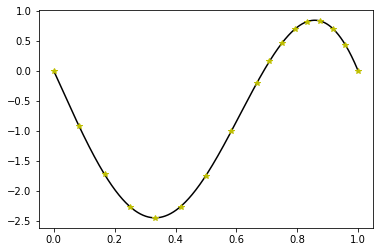

In [27]:
G = np.zeros([m,m])
F = np.zeros(m)

K = np.array([[1, -1],[-1, 1]])
P = np.array([[-1, 1],[-1, 1]])
Q = np.array([[2, 1],[1, 2]])

Fe = np.zeros(2)

#local_index = np.zeros(2)

ke = 1
pe = 0
qe = 1

for i in range(m-1):
    Ke = (ke / (pp[i+1] - pp[i])) * K
    Pe = (pe / 2) * P
    Qe = ((pp[i+1] - pp[i])*qe / 6) * Q
    Me = Ke + Pe +Qe
    
    Fe[0] = quad(lambda x,p: h(x)*(1 - (x - pp[i])/(pp[i+1] - pp[i])), pp[i], pp[i+1], args=(i,))[0]
    Fe[1] = quad(lambda x,p: h(x)*((x - pp[i])/(pp[i+1] - pp[i])), pp[i], pp[i+1], args=(i,))[0]
    
    #Mapping the local into the global matrix
    G[i:i+Me.shape[0],i:i+Me.shape[1]] += Me
    F[i:i+Fe.shape[0]] += Fe

    
# Boundary conditions (method 1)
#G[0,:] = 0.0
#G[m-1,:] = 0.0
#G[0,0] = 1.0
#G[m-1,m-1] = 1.0
#F[0] = 0.0
#F[m-1] = 0.0

# Boundary conditions method 2
G[0,0] = 10**10
G[-1,-1] = 10**10
F[0] = 0*10**10
F[-1] = 0*10**10

#Solving the linear system
sol_FEM = np.matmul(F, np.linalg.pinv(G))

plt.plot(x, ua(x), 'k', pp, sol_FEM, 'y*')

## Making $h(\zeta)$ also a linear combination of the bases (inside the element)

\begin{eqnarray}
h(\zeta) = h_1^e\psi_1+h_2^e\psi_2
\end{eqnarray} 



\begin{eqnarray}
\left[ \begin{array}{c}
IV^e \\
V^e \end{array} \right] = \frac{\Delta_x^e}{2}
\begin{bmatrix}
     (h_1^e + h_2^e)/2 \\
     (h_1^e + h_2^e)/2 \\
\end{bmatrix}
\end{eqnarray} 


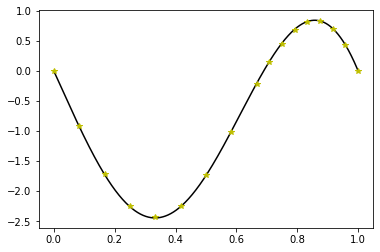

In [28]:
G = np.zeros([m,m])
F = np.zeros(m)

K = np.array([[1, -1],[-1, 1]])
P = np.array([[-1, 1],[-1, 1]])
Q = np.array([[2, 1],[1, 2]])

Fe = np.zeros(2)

#local_index = np.zeros(2)

ke = 1
pe = 0
qe = 1

for i in range(m-1):
    Ke = (ke / (pp[i+1] - pp[i])) * K
    Pe = (pe / 2) * P
    Qe = ((pp[i+1] - pp[i])*qe / 6) * Q
    Me = Ke + Pe +Qe
    
    #Fe[0] = quad(lambda x,p: h(x)*(1 - (x - pp[i])/(pp[i+1] - pp[i])), pp[i], pp[i+1], args=(i,))[0]
    #Fe[1] = quad(lambda x,p: h(x)*((x - pp[i])/(pp[i+1] - pp[i])), pp[i], pp[i+1], args=(i,))[0]
    
    Fe[0] = (pp[i+1] - pp[i]) * h((pp[i] + pp[i+1])/2) / 2
    Fe[1] = (pp[i+1] - pp[i]) * h((pp[i] + pp[i+1])/2) / 2
    
    #Mapping the local into the global matrix
    G[i:i+Me.shape[0],i:i+Me.shape[1]] += Me
    F[i:i+Fe.shape[0]] += Fe

# Boundary conditions method 2
G[0,0] = 10**10
G[-1,-1] = 10**10
F[0] = 0*10**10
F[-1] = 0*10**10

#Solving the linear system
sol_FEM = np.matmul(F, np.linalg.pinv(G))

plt.plot(x, ua(x), 'k', pp, sol_FEM, 'y*')

# Generalizing Finite Element Method for "any" equation

\begin{eqnarray}
-\frac{d}{dx}\left(k(x)\frac{du}{dx}\right)+p(x)\frac{du}{dx}+q(x)u=h(x), \nonumber
\end{eqnarray}

## $k(x)$, $q(x)$, $q(x)$, and $h(x)$ are constant inside each element.  

\begin{eqnarray}
K_e=\frac{k_e}{x^e_2-x^e_1}\left[ \begin{array}{cc}
1 & -1 \\
-1 & 1 \end{array} \right], \nonumber
\end{eqnarray}

\begin{eqnarray}
P_e=\frac{p_e}{2}\left[ \begin{array}{cc}
-1 & 1 \\
-1 & 1 \end{array} \right], \nonumber
\end{eqnarray}
## and,
\begin{eqnarray}
Q_e=\frac{q_e(x^e_2-x^e_1)}{6}\left[ \begin{array}{cc}
2 & 1 \\
1 & 2 \end{array} \right]. \nonumber
\end{eqnarray}
## where $M_e=K_e+P_e+Q_e$. That is because,
\begin{eqnarray}
\int_{x^e_1}^{x^e_2} [\phi_i'(x)\phi_i'(x)]dx&=&\frac{1}{x^e_2-x^e_1} \; \; \; \; (i=1,2), \nonumber \\
\int_{x^e_1}^{x^e_2} [\phi_i'(x)\phi_j'(x)]dx&=&-\frac{1}{x^e_2-x^e_1} \; \; \; \; (i=1,2 \; e \; j=1,2), \nonumber \\
\int_{x^e_1}^{x^e_2} [\phi_i(x)\phi_1'(x)]dx&=&-\frac{1}{2} \; \; \; \; \; \; (i=1,2), \nonumber \\
\int_{x^e_1}^{x^e_2} [\phi_i(x)\phi_2'(x)]dx&=&\frac{1}{2} \; \; \; \; \; \; (i=1,2), \nonumber \\
\int_{x^e_1}^{x^e_2} [\phi_i(x)\phi_i(x)]dx&=&\frac{x^e_2-x^e_1}{3} \; \; \; \; (i=1,2), \nonumber
\end{eqnarray}
## and, 
\begin{eqnarray}
\int_{x^e_1}^{x^e_2} [\phi_i(x)\phi_j(x)]dx&=&\frac{x^e_2-x^e_1}{6} \; \; (i=1,2\; e \; j=1,2). \nonumber
\end{eqnarray}

## finally
\begin{eqnarray}
F_e=\frac{h_e(x^e_2-x^e_1)}{2}\left[ \begin{array}{c}
1 \\
1 \end{array} \right], \nonumber
\end{eqnarray}
## because,
\begin{eqnarray}
\int_{x^e_1}^{x^e_2} [\phi_i(x)]dx=\frac{x^e_2-x^e_1}{2}\; \; (i=1,2). \nonumber
\end{eqnarray}

###############################################################################################################
# Heat flux

# Program for the numerical solution of the vertical one-dimensional general heat conduction equation

\begin{eqnarray}
C(\theta)\frac{\partial T}{\partial t} = \frac{ \partial}{\partial z}(\lambda(\theta)\frac{\partial T}{\partial z}) - C_w \frac{\partial(qT)}{\partial z}
\end{eqnarray}

## Discritizing the time,  $\frac{\partial T}{\partial t} \approx \frac{T - T_i}{\Delta t}$

\begin{eqnarray}
 -\frac{ \partial}{\partial z}(\lambda(\theta)\frac{\partial T}{\partial z}) + C_w \frac{\partial(qT)}{\partial z} + C(\theta)\frac{T}{\Delta t} = C(\theta)\frac{T_i}{\Delta t}
\end{eqnarray}

### SO,

## $k(x) = \lambda(\theta)$,  $p(x) = C_w q$, $q(x) = C(\theta)/\Delta t$, and $h(x) = C(\theta) T_i/\Delta t$

### inside each element these functions are constant, for example $\lambda(\theta) = \lambda_e$

In [29]:
Tavg = 30
Amp = 5
w = 0.6
dt = 3600
q = 0 #soil water flow equal zero

#soil water retention parameters in Van Genuchten-Mualem model
# LOAM SOIL
fwr = 0.078    #residual volumetric soil water content, m^3 m^-3
fws = 0.430    #saturated volumetric soil water content, m^3 m^-3
alpha = 3.6    #inverse of the bubbling pressure head, m^-1
n = 1.56       #pore-size distribution index
m = 1 - 1/n

num = 101
z = np.linspace(0,1,num)
pp = z # only to maintain the variable name


#initial soil temperature (Celsius)
#initial soil water pressure head (m)
#initial soil water content (m^3 m^-3)
T = np.zeros(len(z))
T += 20

h = -2 - z
fw = fwr + (fws - fwr) / (1 + (np.abs(alpha*h)**n)**m) #verify
fs = 1 - fws     #solid fraction
fa = fws - fw #air fraction


# volumetric heat capacity (J/m3.K)
# LOAM SOIL
Cs = 1.92e6    # solids
Cw = 4.18e6    # water
Ca = 0         # air

Ct = fs*Cs + fw*Cw + fa*Ca #soil


## Chung and Horton thermal conductivity (J/m.s.K)
## LOAM SOIL
b1 = 0.243
b2 = 0.393
b3 = 1.534

kn = b1 + b2*fw + b3*np.sqrt(fw)

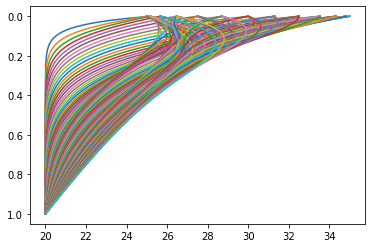

In [30]:

# initial time (s)
t = 0

m = len(pp)
G = np.zeros([m,m])
F = np.zeros(m)

K = np.array([[1, -1],[-1, 1]])
P = np.array([[-1, 1],[-1, 1]])
Q = np.array([[2, 1],[1, 2]])

Fe = np.zeros(2)

#local_index = np.zeros(2)

Big = 10**10
while (t < 5*86400):
    G = G*0
    F = F*0
    for i in range(len(z) - 1):
                 
        # is the weightening factor needed????  
        ke = (kn[i] + kn[i+1]) / 2
        pe = Cw * q
        qe = ((Ct[i] + Ct[i+1])/2) / dt
        
        Ke = (ke / (pp[i+1] - pp[i])) * K
        Pe = (pe / 2) * P
        Qe = ((pp[i+1] - pp[i])*qe / 6) * Q
        Me = Ke + Pe + Qe
        
        
        f1 = ((Ct[i] + Ct[i+1])/2)*T[i]/dt
        f2 = ((Ct[i] + Ct[i+1])/2)*T[i+1]/dt
        
        Fe[0] = (pp[i+1] - pp[i])*( (f1 + f2)/2 ) / 2
        Fe[1] = (pp[i+1] - pp[i])*( (f1 + f2)/2 ) / 2
        
        
    #Mapping the local into the global matrix
        G[i:i+Me.shape[0],i:i+Me.shape[1]] += Me
        F[i:i+Fe.shape[0]] += Fe

# Boundary conditions (method 1)
#    G[0,:] = 0.0
#    G[m-1,:] = 0.0
#    G[0,0] = 1.0
#    G[m-1,m-1] = 1.0
#    F[0] = (Tavg + Amp * np.sin(2*np.pi*t/86400 - 7 * np.pi/12))
#    F[m-1] = 20.0        
        

# Boundary conditions method 2
    G[0,0] = Big
    G[-1,-1] = Big
    F[0] = (Tavg + Amp * np.sin(2*np.pi*t/86400 - 7 * np.pi/12))*Big
    F[-1] = 20*Big

#Solving the linear system
    sol_FEM = np.matmul(F, np.linalg.pinv(G))
    T = sol_FEM
    t += dt
    plt.plot(sol_FEM, pp, '-')   
plt.gca().invert_yaxis()

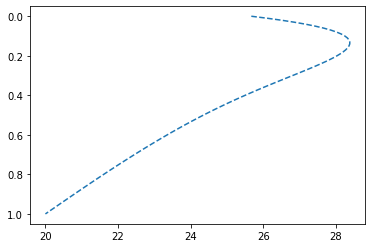

In [31]:
plt.plot(sol_FEM, pp, '--')
plt.gca().invert_yaxis()

In [32]:
t

432000

# Result from Finite Difference Method

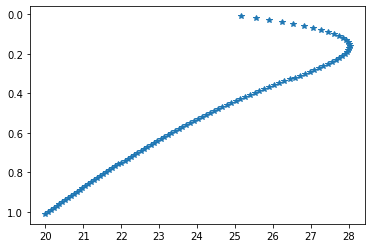

In [33]:
dd = np.loadtxt("/home/felipe/1.out")
plt.plot(dd[:,1], dd[:,0]/100, '*')
plt.gca().invert_yaxis()

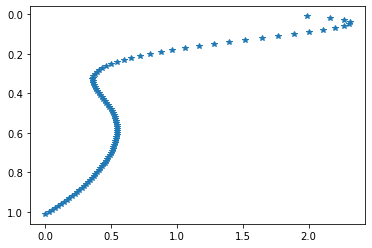

In [34]:
err = 100*abs(dd[:,1]-sol_FEM)/dd[:,1]
plt.plot(err, dd[:,0]/100, '*')
plt.gca().invert_yaxis()